In [16]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:

df = pd.read_csv("dataset/weight-height.csv")


In [5]:

df.sample(5)

,Gender,Height,Weight
5044,Female,63.461665,128.950961
5007,Female,65.652156,165.083001
839,Male,70.046953,190.002405
2695,Male,67.575473,180.419530
814,Male,64.774237,182.589844


In [6]:
df.shape

(10000, 3)

In [7]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: xlabel='Weight', ylabel='Height'>

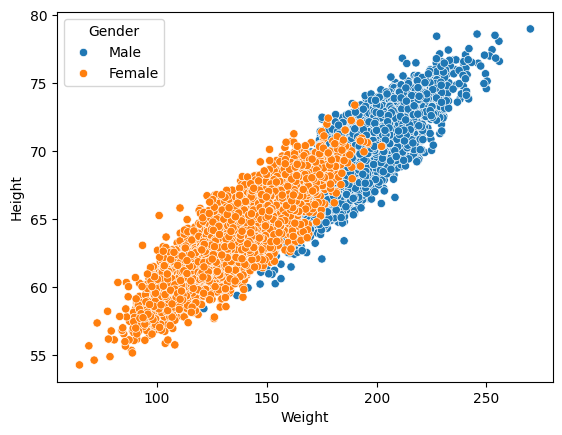

In [12]:

sns.scatterplot(data=df,x="Weight",y="Height",hue="Gender")

<Axes: xlabel='Height', ylabel='Density'>

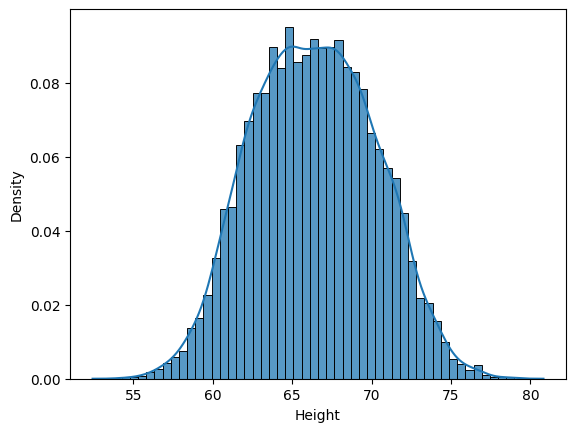

In [20]:

ax = plt.subplot(1,1,1)
sns.histplot(data=df,x="Height",ax=ax,stat="density")
sns.kdeplot(data=df,x="Height",ax=ax)


<Axes: xlabel='Height'>

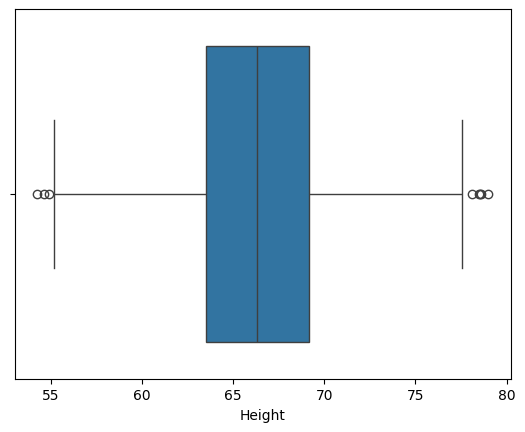

In [21]:

sns.boxplot(data=df,x="Height")


In [23]:
upper_limit = df["Height"].quantile(0.99)
lower_limit = df["Height"].quantile(0.01)

print("upper_limit: ",upper_limit)
print("lower_limit: ",lower_limit)

upper_limit:  74.7857900583366
lower_limit:  58.13441158671655


In [26]:
new_df = df[(df["Height"] <= upper_limit) & (df["Height"]>=lower_limit)]

In [27]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [28]:
new_df["Height"].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

Text(0.5, 1.0, 'New Dataset\n skew: 0.04308037614926446')

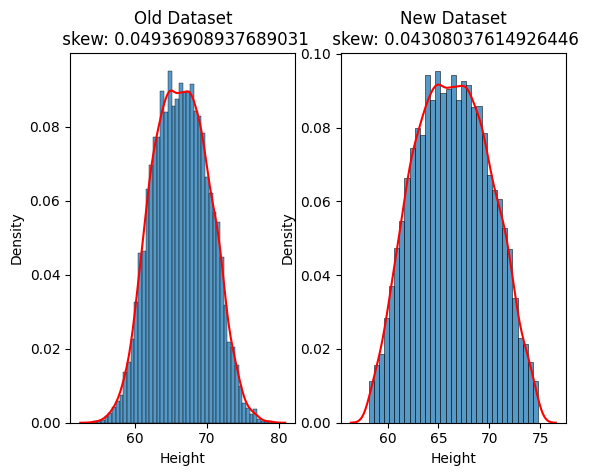

<Figure size 2000x2000 with 0 Axes>

In [49]:

ax = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)


sns.kdeplot(data=df,x="Height",ax=ax,color="r")
sns.histplot(data=df,x="Height",stat="density",ax=ax)
ax.set_title("Old Dataset"+f"\n skew: {df["Height"].skew()}")

sns.kdeplot(data=new_df,x="Height",ax=ax1,color="r")
sns.histplot(data=new_df,x="Height",stat="density",ax=ax1)
ax1.set_title("New Dataset"+f"\n skew: {new_df["Height"].skew()}")


<Axes: xlabel='Height'>

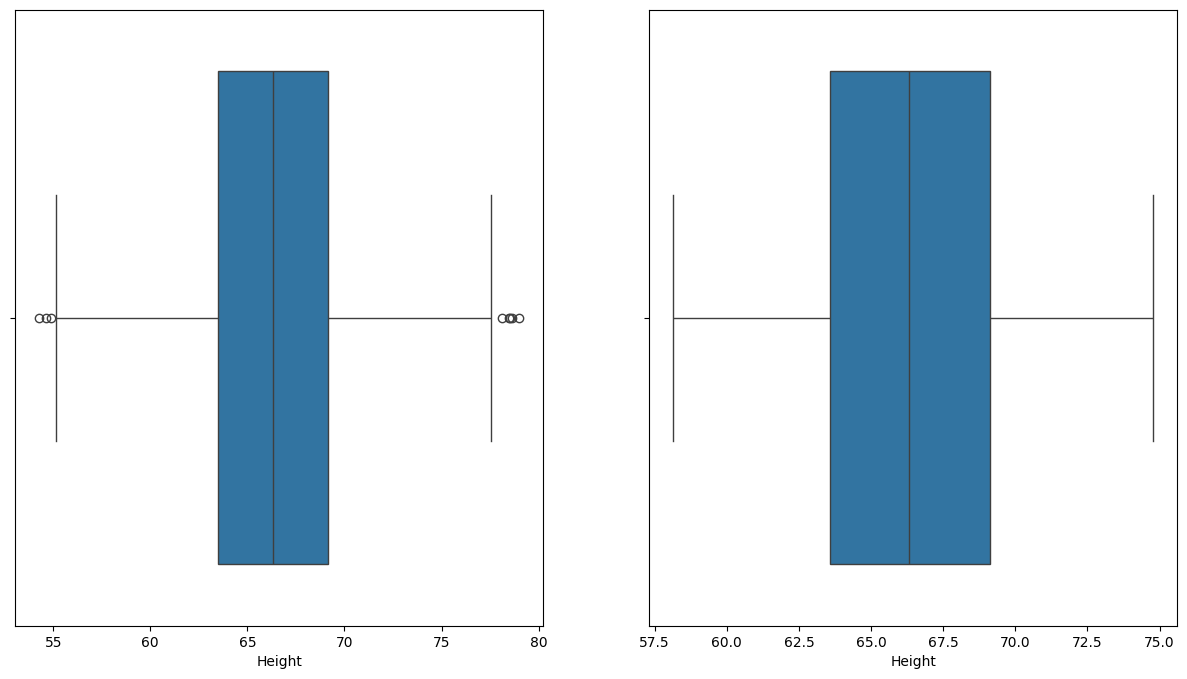

In [58]:

fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.boxplot(data=df,x="Height",ax=ax[0])
sns.boxplot(data=new_df,x="Height",ax=ax[1])